<a href="https://colab.research.google.com/github/honey-06-dev/Pneumonia-Detect/blob/main/pneumonia_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import cv2
from keras.preprocessing.image import img_to_array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)


In [ ]:
train_images = "/content/drive/MyDrive/xraysdata/chest_xray/train"

In [ ]:
train_generator = train_datagen.flow_from_directory(train_images,
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 5216 images belonging to 2 classes.


Model ouptput
0:Normal
1:pneumonia

In [ ]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

Loading validation data

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/xraysdata/chest_xray/val',
    target_size= (300,300),
    batch_size = 128,
    class_mode = 'binary')

Found 16 images belonging to 2 classes.


plotting images from pneumonia dataset

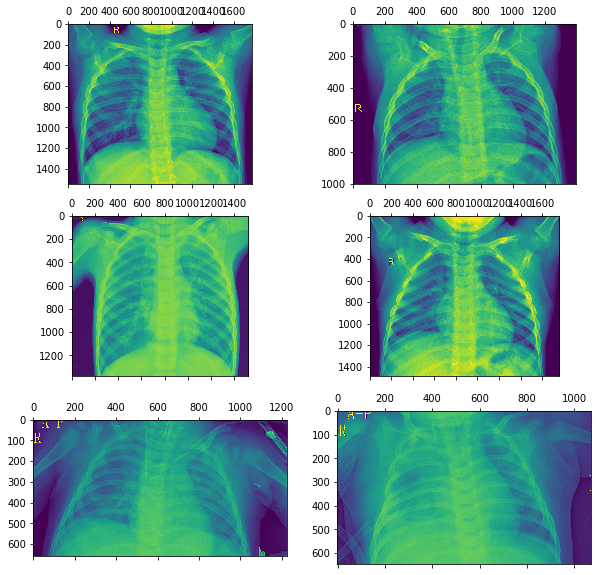

In [ ]:
#Pneumonia
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[41]))
plot2.matshow(plt.imread(train_generator.filepaths[176]))
plot3.matshow(plt.imread(train_generator.filepaths[1553]))
plot4.matshow(plt.imread(train_generator.filepaths[354]))
plot5.matshow(plt.imread(train_generator.filepaths[2679]))
plot6.matshow(plt.imread(train_generator.filepaths[2710]))

images plotting without pneumonia

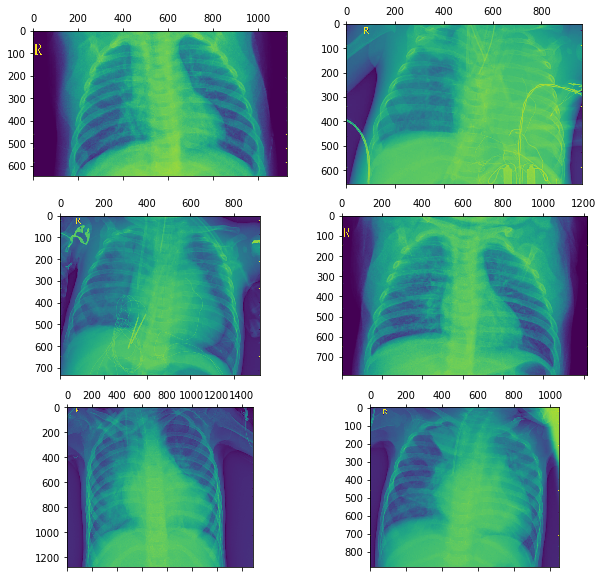

In [ ]:
#Normal
plot_image = plt.figure(figsize=(10,10))

plot1 = plot_image.add_subplot(3,2,1)
plot2 = plot_image.add_subplot(3,2,2)
plot3 = plot_image.add_subplot(3,2,3)
plot4 = plot_image.add_subplot(3,2,4)
plot5 = plot_image.add_subplot(3,2,5)
plot6 = plot_image.add_subplot(3,2,6)
plot1.matshow(plt.imread(train_generator.filepaths[1419]))
plot2.matshow(plt.imread(train_generator.filepaths[1365]))
plot3.matshow(plt.imread(train_generator.filepaths[1400]))
plot4.matshow(plt.imread(train_generator.filepaths[1350]))
plot5.matshow(plt.imread(train_generator.filepaths[1345]))
plot6.matshow(plt.imread(train_generator.filepaths[1349]))

metrics accuracy

In [ ]:
model= tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16, (3,3), activation= 'relu', input_shape= (300, 300, 3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(256, activation= 'relu'),
                                   tf.keras.layers.Dense(512, activation= 'relu'),
                                   tf.keras.layers.Dense(1, activation= 'sigmoid')
])
model.summary()
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

Training the model for 50 epoches

In [ ]:
history = model.fit(train_generator, epochs = 50, validation_data = validation_generator)

Epoch 1/50
41/41 [==============================] - 1371s 33s/step - loss: 0.5773 - accuracy: 0.7521 - val_loss: 1.0032 - val_accuracy: 0.6875
Epoch 2/50
41/41 [==============================] - 135s 3s/step - loss: 0.3297 - accuracy: 0.8549 - val_loss: 0.6577 - val_accuracy: 0.6875
Epoch 3/50
41/41 [==============================] - 137s 3s/step - loss: 0.2364 - accuracy: 0.8980 - val_loss: 0.6425 - val_accuracy: 0.6875
Epoch 4/50
41/41 [==============================] - 135s 3s/step - loss: 0.2083 - accuracy: 0.9168 - val_loss: 1.3724 - val_accuracy: 0.6250
Epoch 5/50
41/41 [==============================] - 136s 3s/step - loss: 0.1931 - accuracy: 0.9225 - val_loss: 0.5116 - val_accuracy: 0.8125
Epoch 6/50
41/41 [==============================] - 136s 3s/step - loss: 0.1914 - accuracy: 0.9248 - val_loss: 0.9131 - val_accuracy: 0.6250
Epoch 7/50
41/41 [==============================] - 134s 3s/step - loss: 0.1769 - accuracy: 0.9316 - val_loss: 0.9023 - val_accuracy: 0.6250
Epoch 8/50


In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

Plotting Loss Vs Num. of Epochs

Loss Vs Num. of Epochs
Training Loss : 0.0519 
Value loss : 0.0701


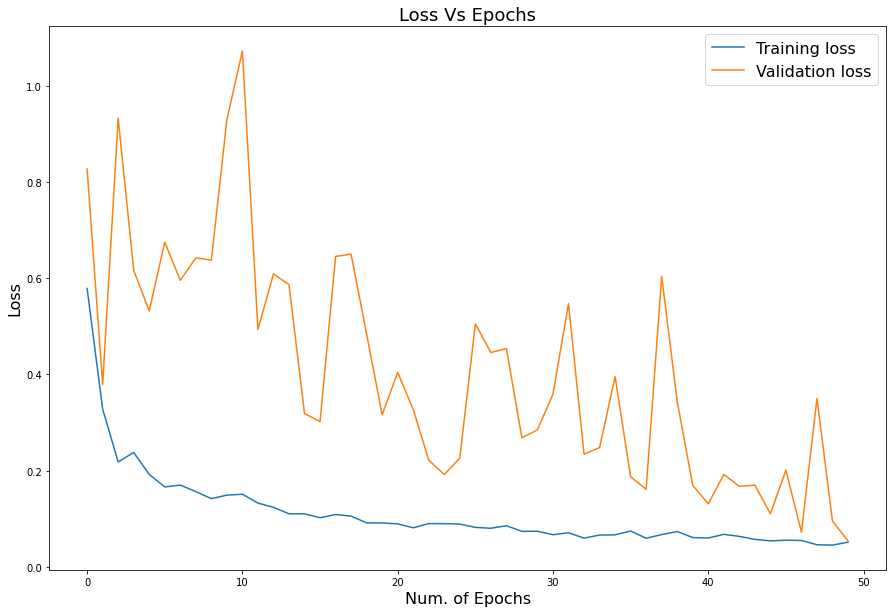

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['Training loss','Validation loss'], fontsize=16)
plt.title("Loss Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16)
print("Loss Vs Num. of Epochs")
print("Training Loss : 0.0519","\nValue loss : 0.0701")
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

Plotting Accuracy Vs Num. of Epochs

Accuracy Vs Epochs
Training accuracy : 0.9816 
Value accuracy : 1.0000


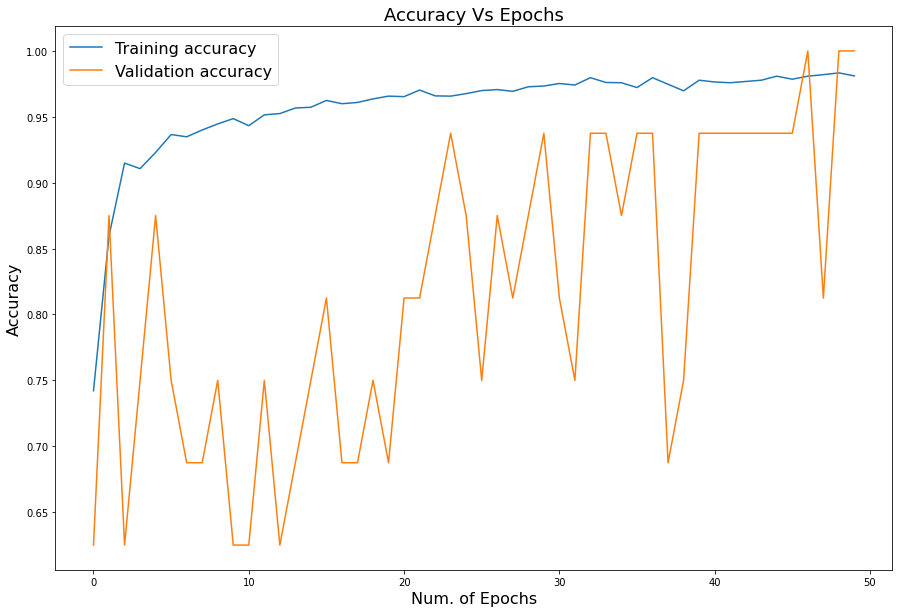

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['Training accuracy','Validation accuracy'], fontsize=16)
plt.title("Accuracy Vs Epochs", fontsize=18)
plt.xlabel("Num. of Epochs", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
print("Accuracy Vs Epochs")
print("Training accuracy : 0.9816","\nValue accuracy : 1.0000")
plt.show()

In [ ]:
model.save("trained.h5")

In [ ]:
from keras.models import load_model
model = load_model("trained.h5")

In [ ]:
eval_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = eval_datagen.flow_from_directory(
    '/content/drive/MyDrive/chest_xray/test',
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)

eval_result = model.evaluate_generator(test_generator, 624)
print('loss :', eval_result[0])
print('accuracy :', eval_result[1])

Found 624 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


loss : 0.2363322377204895
accuracy : 0.9214743375778198


An image is used from drive for prediction

In [ ]:
img= cv2.imread('/content/drive/MyDrive/xraysdata/chest_xray/test/NORMAL/IM-0007-0001.jpeg')
tempimg = img
img = cv2.resize(img,(300,300))
img = img/255.0
img = img.reshape(1,300,300,3)
model.predict(img)

array([[0.12220421]], dtype=float32)

The prediction shows value as 0.01 which is less than 0.5

so our model has to predict it as Normal which is done below.

Prediction: Normal


Text(0.5, 1.0, 'Prediction: Normal')

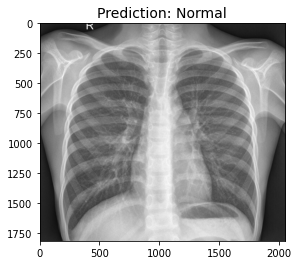

In [ ]:
prediction = model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)

In [ ]:
img= cv2.imread('/content/drive/MyDrive/xraysdata/chest_xray/test/PNEUMONIA/person100_bacteria_481.jpeg')
tempimg = img
img = cv2.resize(img,(300,300))
img = img/255.0
img = img.reshape(1,300,300,3)
model.predict(img)

array([[0.9995049]], dtype=float32)

Prediction: Pneumonia


Text(0.5, 1.0, 'Prediction: Pneumonia')

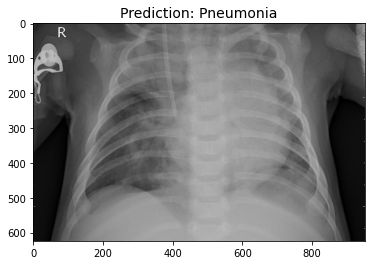

In [ ]:
prediction = model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)